1. Carga y limpieza de datos

In [ ]:
import pandas as pd


file_path = 'historico_BTC-USD.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Limpieza y transformación de datos
data_cleaned = data.iloc[2:].copy()
data_cleaned.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']] = data_cleaned[
    ['Close', 'High', 'Low', 'Open', 'Volume']
].apply(pd.to_numeric, errors='coerce')


data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 2 to 3774
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3773 non-null   datetime64[ns]
 1   Close   3773 non-null   float64       
 2   High    3773 non-null   float64       
 3   Low     3773 non-null   float64       
 4   Open    3773 non-null   float64       
 5   Volume  3773 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 177.0 KB


2. Estadísticas descriptivas

In [ ]:
# Estadísticas descriptivas básicas
descriptive_stats = data_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']].describe().T
descriptive_stats['Skewness'] = data_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']].skew()
descriptive_stats['Kurtosis'] = data_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']].kurt()

# Mostrar estadísticas descriptivas
print(descriptive_stats)


         count          mean           std           min           25%  \
Close   3773.0  1.987027e+04  2.257237e+04  1.781030e+02  1.240000e+03   
High    3773.0  2.029102e+04  2.303122e+04  2.117310e+02  1.257980e+03   
Low     3773.0  1.938201e+04  2.203639e+04  1.715100e+02  1.215620e+03   
Open    3773.0  1.984611e+04  2.254209e+04  1.768970e+02  1.232160e+03   
Volume  3773.0  1.867695e+10  2.039580e+10  5.914570e+06  4.358030e+08   

                 50%           75%           max  Skewness   Kurtosis  
Close   9.386788e+03  3.115644e+04  1.061406e+05  1.306565   1.049436  
High    9.553126e+03  3.195729e+04  1.082684e+05  1.299884   1.018543  
Low     9.232648e+03  3.023665e+04  1.052917e+05  1.313198   1.081086  
Open    9.380870e+03  3.115148e+04  1.061473e+05  1.305005   1.043171  
Volume  1.473419e+10  2.989318e+10  3.509679e+11  2.446627  21.071021  


 3. Gráfico de línea de precios

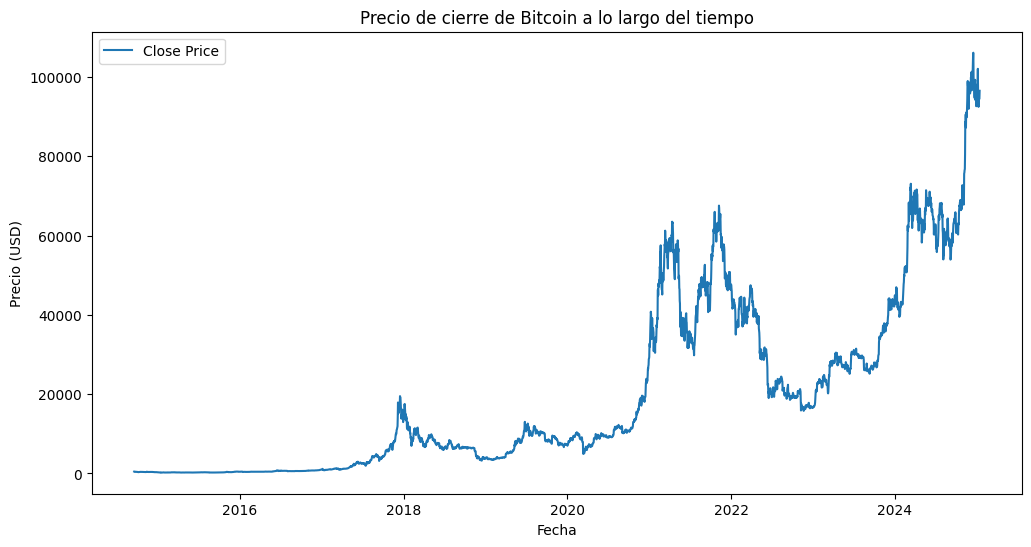

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de línea de precios
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Close'], label='Close Price')
plt.title('Precio de cierre de Bitcoin a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


4. Histograma de precios

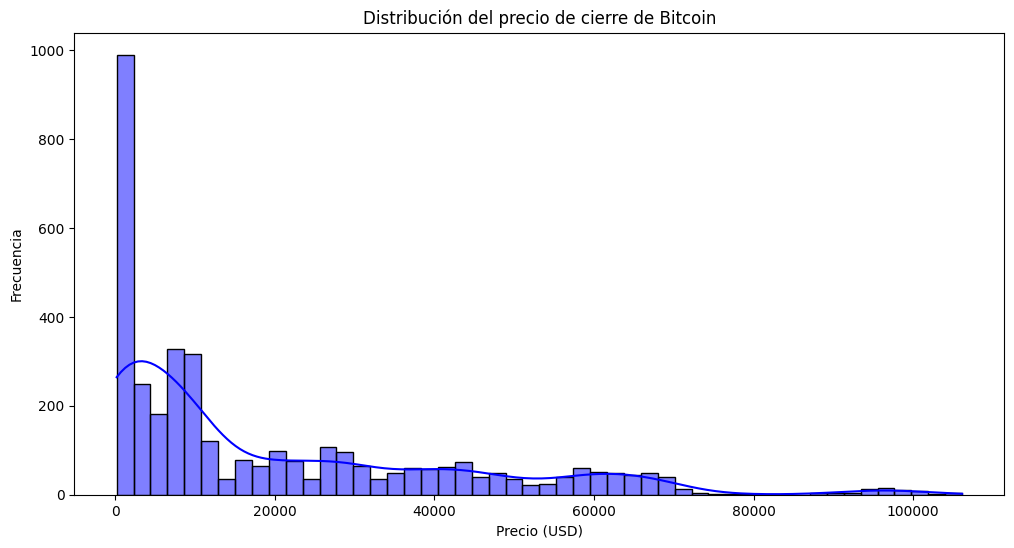

In [ ]:
import seaborn as sns

# Histograma de precios
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Close'], bins=50, kde=True, color='blue')
plt.title('Distribución del precio de cierre de Bitcoin')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()


5. Boxplot del precio por mes

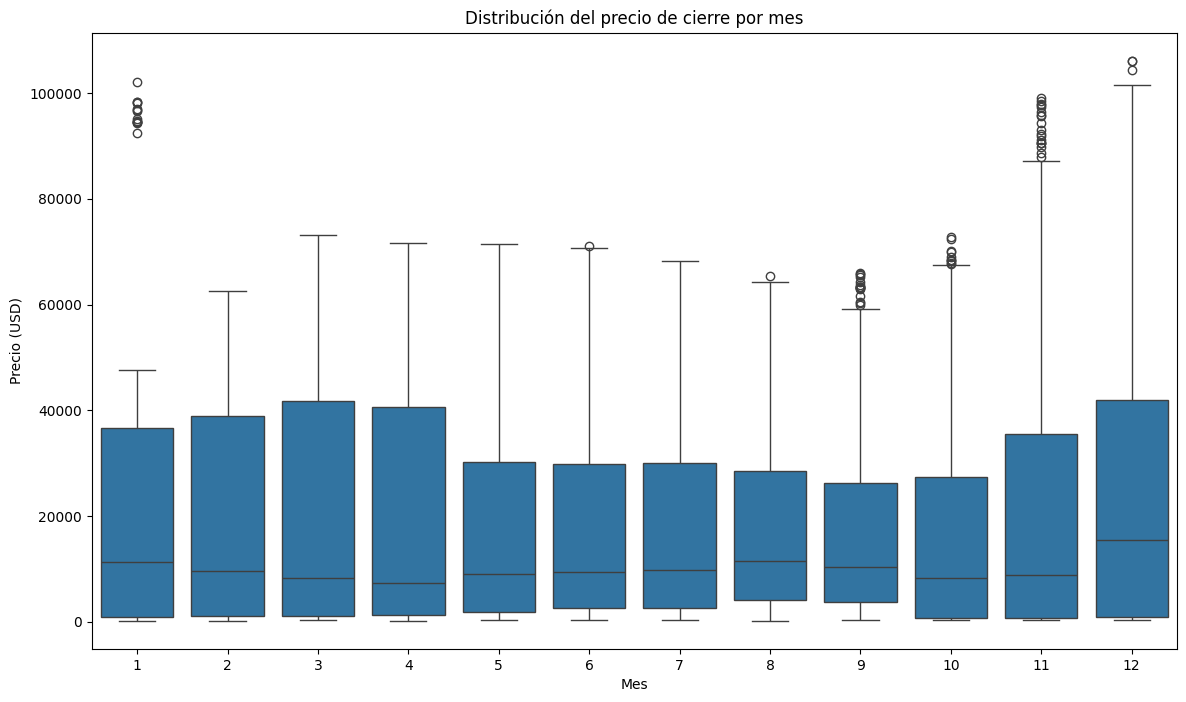

In [ ]:
# Agregar columnas de mes y año
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Year'] = data_cleaned['Date'].dt.year

# Boxplot del precio por mes
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Close', data=data_cleaned)
plt.title('Distribución del precio de cierre por mes')
plt.xlabel('Mes')
plt.ylabel('Precio (USD)')
plt.show()


6. Análisis adicional: Tendencia y volatilidad

Desviación estándar móvil

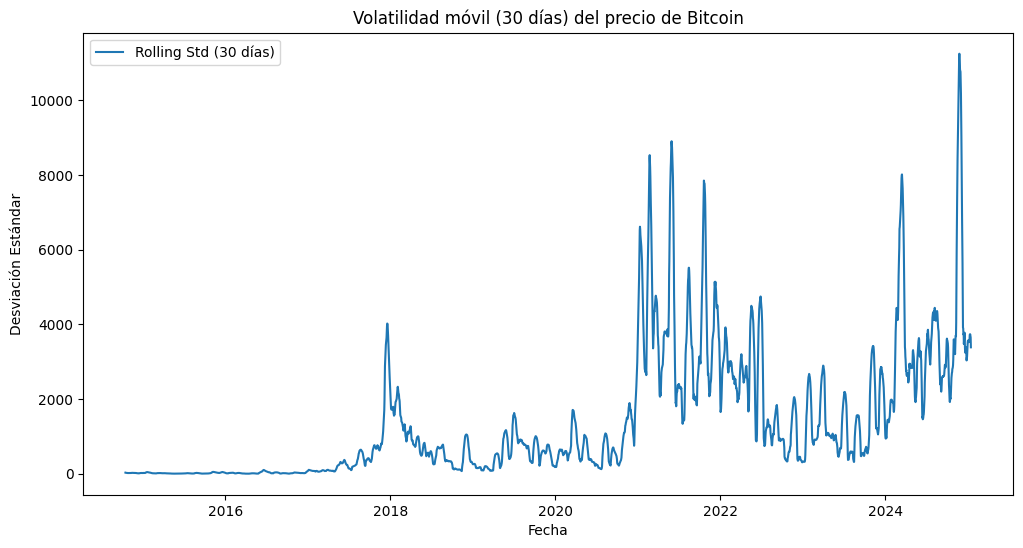

In [ ]:
# Desviación estándar móvil
data_cleaned['Rolling_STD'] = data_cleaned['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Rolling_STD'], label='Rolling Std (30 días)')
plt.title('Volatilidad móvil (30 días) del precio de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Desviación Estándar')
plt.legend()
plt.show()


Media móvil

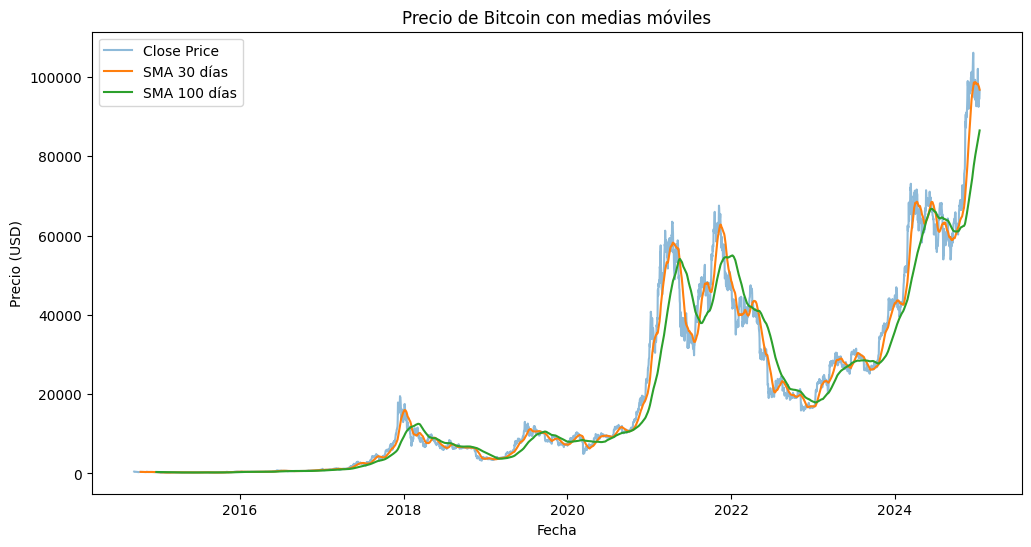

In [ ]:
# Media móvil
data_cleaned['SMA_30'] = data_cleaned['Close'].rolling(window=30).mean()
data_cleaned['SMA_100'] = data_cleaned['Close'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Date'], data_cleaned['Close'], label='Close Price', alpha=0.5)
plt.plot(data_cleaned['Date'], data_cleaned['SMA_30'], label='SMA 30 días')
plt.plot(data_cleaned['Date'], data_cleaned['SMA_100'], label='SMA 100 días')
plt.title('Precio de Bitcoin con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


7. Mapa de calor de correlaciones

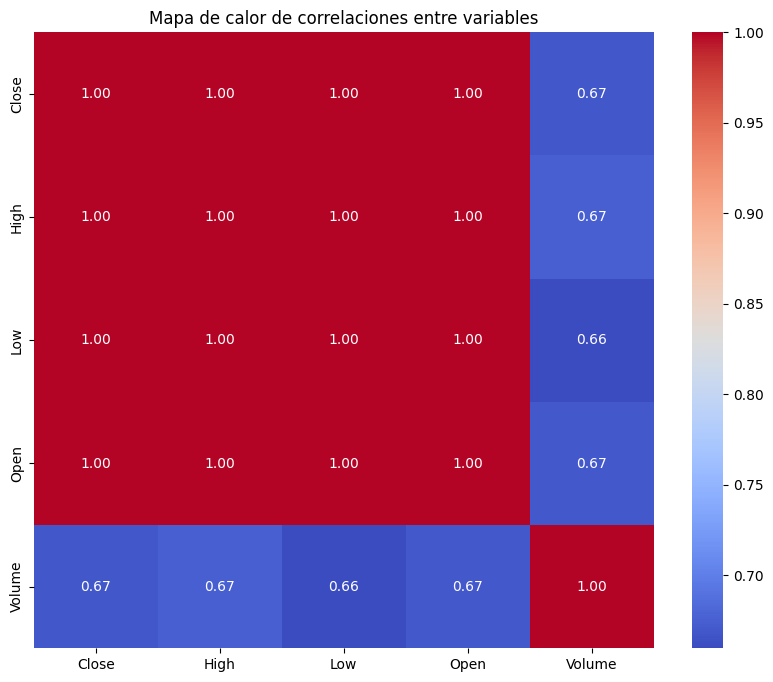

In [ ]:
# Calcular correlaciones
correlations = data_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']].corr()

# Visualización de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones entre variables')
plt.show()


8. Gráfico de autocorrelación

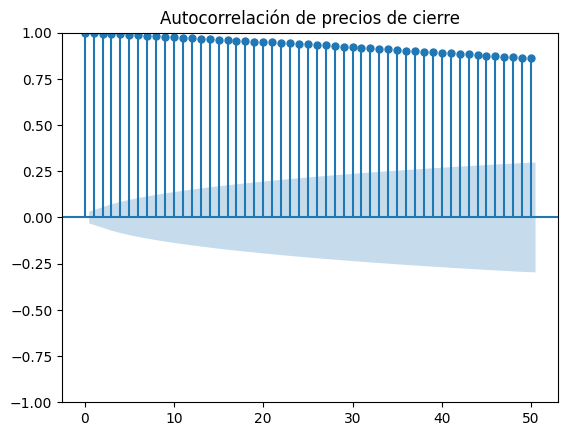

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Gráfico de autocorrelación
plot_acf(data_cleaned['Close'], lags=50, title="Autocorrelación de precios de cierre")
plt.show()
